In [6]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import fluids as fl
from pint import _DEFAULT_REGISTRY as u

In [7]:
#converter function
def convertFunc():
    massFlow = 2*(u.kilogram/u.second)
    density = 1100*(u.kilogram/u.meter**3)
    viscosity = 274.41*(u.micropascal*u.second)
    roughness = 0.00001*(u.meter)
    minDiam = 0.1*(u.inch)
    maxDiam = 5*(u.inch)
    diamStep = 0.01*(u.inch)
    straightLength = 2*(u.meter)
    bendAngle = 45*(u.degrees)
    
    # add innumbends anglebends fittings valves

    #variables to standard units
    massFlowS = massFlow.to("kilogram/second")
    densityS = density.to("kilogram/meter**3")
    viscosityS = viscosity.to("pascal*second")
    roughnessS = roughness.to("meter")
    minDiamS = minDiam.to("meter")
    maxDiamS = maxDiam.to("meter")
    diamStepS = diamStep.to("meter")
    straightlengthS = straightLength.to("meter")
    bendAngleS = bendAngle.to("degrees")
    return massFlowS, densityS, viscosityS, roughnessS, minDiamS, maxDiamS, diamStepS, straightlengthS
    
#def printFunc():
    #massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()

    #print(massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength)

    #add dictionary to easily assign numbers to variables

#printFunc()

In [8]:
def variablesFunc():
    #Input Variables, Units are Assigned
    massFlow, density, viscosity, roughness, minDiam, maxDiam, diamStep, straightLength = convertFunc()
    
    #Calculated Variables
    diamRange = (np.arange(minDiam.magnitude, maxDiam.magnitude, diamStep.magnitude))*(u.meter)
    areaRange = np.square(diamRange / (2*u.dimensionless)) * np.pi*(u.dimensionless)
    velocityRange = np.divide((massFlow), (areaRange * density))

    #Creating Empty Arrays For Variable Ranges
    reynoldsRange = np.empty(len(diamRange))
    frictionFactorRange = np.empty(len(diamRange))
    kFactorRange = np.empty(len(diamRange))
    pressureDropRange = np.empty(len(diamRange))
    

    #Iterating Through Diameters, Calculating Variable Ranges
    for i in np.arange(0, len(diamRange), 1):
        reynoldsRange[i] = fl.units.Reynolds(V=velocityRange[i], mu = viscosity, rho = density, D = diamRange[i])
        frictionFactorRange[i] = fl.units.friction_factor(Re = reynoldsRange[i], eD = np.divide(roughness,diamRange[i]), Darcy = True)
        kFactorRange[i] = fl.units.K_from_f(fd = frictionFactorRange[i], L = straightLength, D = diamRange[i])
        pressureDrop = fl.units.dP_from_K(K = kFactorRange[i], rho = density, V = velocityRange[i]) #Variable to temporarily store pressure drop

        pressureDropRange[i] = pressureDrop.magnitude #Array collects all pressure drop values
        
    pressureDropRange = pressureDropRange * pressureDrop.units #Unit is taken from the last pressure drop value and added here (done bc you can't add pint quantities to np arrays)

    #Plots Diameter Against Pressure Drop
    fig, ax = plt.subplots()
    varPlot = ax.plot(diamRange.to("inch"), pressureDropRange.to("psi"))
    ax.grid(visible = True)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.set_xlabel("Diameter (Inches)")
    ax.set_ylabel("Pressure Drop (psi)")
    plt.axvline(x = 0.165, color = 'r', linestyle = '-')
    plt.xticks(np.arange(0, 5+0.5, 0.25), rotation = 'vertical')
    plt.show()

    return density, velocityRange, diamRange, straightLength, frictionFactorRange, pressureDropRange

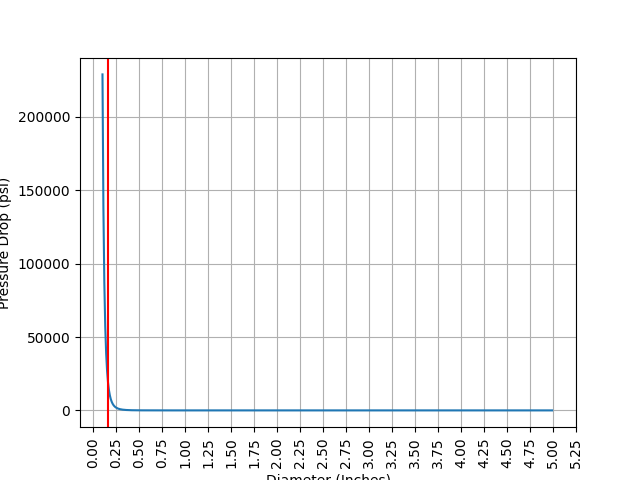

(1100 <Unit('kilogram / meter ** 3')>,
 array([3.58822771e+02, 2.96547745e+02, 2.49182480e+02, 2.12321166e+02,
        1.83072842e+02, 1.59476787e+02, 1.40165145e+02, 1.24160128e+02,
        1.10747769e+02, 9.93968895e+01, 8.97056928e+01, 8.13657077e+01,
        7.41369362e+01, 6.78303915e+01, 6.22956200e+01, 5.74116434e+01,
        5.30802916e+01, 4.92212306e+01, 4.57682106e+01, 4.26662035e+01,
        3.98691968e+01, 3.73384777e+01, 3.50412862e+01, 3.29497494e+01,
        3.10400321e+01, 2.92916548e+01, 2.76869422e+01, 2.62105750e+01,
        2.48492224e+01, 2.35912407e+01, 2.24264232e+01, 2.13457925e+01,
        2.03414269e+01, 1.94063154e+01, 1.85342340e+01, 1.77196430e+01,
        1.69575979e+01, 1.62436746e+01, 1.55739050e+01, 1.49447218e+01,
        1.43529108e+01, 1.37955698e+01, 1.32700729e+01, 1.27740396e+01,
        1.23053077e+01, 1.18619098e+01, 1.14420527e+01, 1.10440988e+01,
        1.06665509e+01, 1.03080371e+01, 9.96729920e+00, 9.64318117e+00,
        9.33461944e+00, 9

In [9]:
variablesFunc()


In [10]:
#ALL DEBUGGING
#PROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELLPROGRAMMINGISHELL
testPDrop = fl.units.dP_from_K(K = 1.0, rho = 1.0*(u.kilogram / u.meter **3), V = 1.0*(u.meter / u.second))
print(testPDrop)

a = [1, 2, 3]
b = 1 * (u.kilogram / u.meter **3)
c = [1, 2, 3] * (u.meter / u.second)
AHH = np.empty(1)

A = 1 * u.meter
B = 2 * u.meter

bruh = np.empty(1)

bruh = [A, B]
print(bruh)

AHHRange = np.empty(len(a))

for i in np.arange(0, len(a), 1):
    AHH = fl.units.dP_from_K(K = a[i], rho = b, V = c[i])
    AHHRange[i] = AHH.magnitude

print(AHHRange * AHH.units)

0.5 pascal
[<Quantity(1, 'meter')>, <Quantity(2, 'meter')>]
[0.5 4.0 13.5] pascal
